In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ctr = pd.read_csv("data.csv")

In [3]:
ctr.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1


In [4]:
ctr.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour',
       'y'],
      dtype='object')

In [5]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [6]:
ctr.shape

(99999, 27)

# 1. Perform missing value and outlier treatment, if needed, in the data set you received.

In [7]:
ctr.isnull().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

### There are no null values in the dataset


#### Our target variable is column "click"

In [8]:
ctr["click"].value_counts(normalize=True)*100

False    83.01983
True     16.98017
Name: click, dtype: float64

But the dataset is highly imbalanced

In [9]:
ctr["y"].value_counts(normalize=True)*100

0    83.01983
1    16.98017
Name: y, dtype: float64

### From the above values we can say that column "click" and column "y" both are same. Column "y" is encoded value of column "click"

### Finding for Outliers

In [10]:
numerical_cols = ctr.select_dtypes(
  include = ['int64']).columns.tolist()
print("Numerical columns: ")
print(numerical_cols)

Numerical columns: 
['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour', 'y']


From the graph we have these many numerical features and we need to check whether there are categorical variables or not

In [11]:
ctr["month"].value_counts(normalize=True)*100

10    100.0
Name: month, dtype: float64

From above month value we can say that there is no much variation in month column and we can drop it 

In [12]:
ctr["dayofweek"].value_counts(normalize=True)*100

1    23.269233
2    22.834228
3    20.014200
6     9.326093
4     8.264083
5     8.258083
0     8.034080
Name: dayofweek, dtype: float64

In [13]:
ctr["day"].value_counts(normalize=True)*100 

22    13.092131
28    13.056131
30    10.495105
21    10.213102
29     9.742097
23     9.519095
26     9.326093
24     8.264083
25     8.258083
27     8.034080
Name: day, dtype: float64

From above values in "day" column we can say that they are just date values and doesnt add much value to the prediction.

In [14]:
ctr.nunique()

click                   2
C1                      7
banner_pos              7
site_id              1485
site_domain          1331
site_category          19
app_id               1354
app_domain             96
app_category           21
device_id           16801
device_ip           78013
device_model         3145
device_type             4
device_conn_type        4
C14                  1722
C15                     8
C16                     9
C17                   399
C18                     4
C19                    64
C20                   154
C21                    60
month                   1
dayofweek               7
day                    10
hour                   24
y                       2
dtype: int64

There are not much outliers in the dataset and as we can say that categorical columns are encoded into numerical values

### EDA

Text(0.5, 1.0, 'Count of clicks')

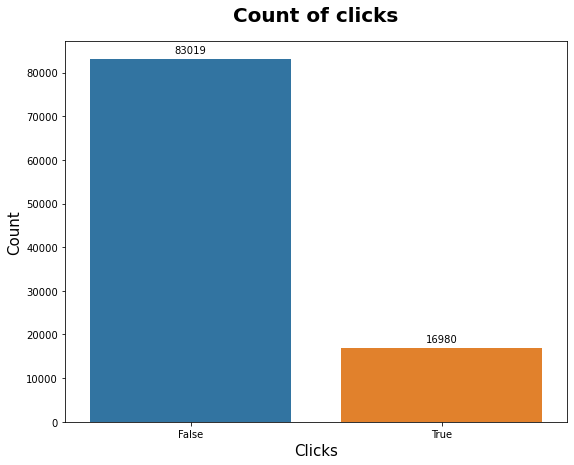

In [15]:
plt.figure(figsize=(9, 7))
status_plot = sns.countplot(x ='click', data = ctr)
for p in status_plot.patches:
    status_plot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.xlabel('Clicks',fontdict={'fontsize': 15})
plt.ylabel('Count',fontdict={'fontsize': 15})
plt.title('Count of clicks',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

click       False   True
banner_pos              
0           59913  11865
1           22978   5074
2              25      5
3               3      1
4              18      1
5               9      0
7              73     34


Text(0.5, 1.0, 'Number of clicks by banner position')

<Figure size 648x504 with 0 Axes>

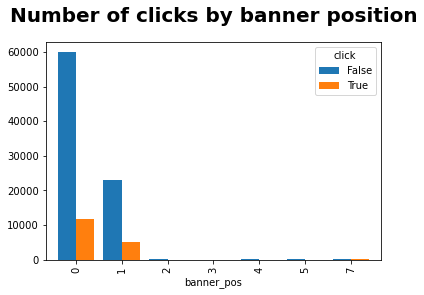

In [16]:
plt.figure(figsize=(9, 7))
CrosstabResult=pd.crosstab(index=ctr['banner_pos'],columns=ctr['click'])
print(CrosstabResult)
 
# Grouped bar chart between "banner position" and "click" columns
splot = CrosstabResult.plot.bar(width = 0.8)

plt.xticks(rotation = 90)
plt.title('Number of clicks by banner position',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

From the graph we can say that most number of ads are placed on 0 and 1 positions and most number of clicks happen in these positions only

click        False   True
device_type              
0             4288   1206
1            76688  15551
4             1747    184
5              296     39


Text(0.5, 1.0, 'Number of clicks by device type')

<Figure size 864x432 with 0 Axes>

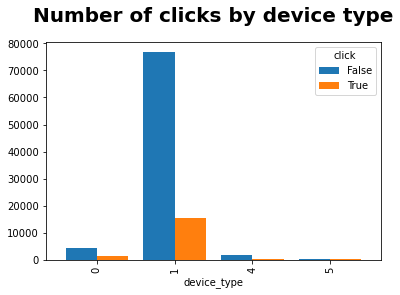

In [17]:
plt.figure(figsize=(12, 6))
CrosstabResult=pd.crosstab(index=ctr['device_type'],columns=ctr['click'])
print(CrosstabResult)
 
#  Grouped bar chart between "device type" and "click" columns
splot = CrosstabResult.plot.bar(width = 0.8)

plt.xticks(rotation = 90)
plt.title('Number of clicks by device type',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

From the graph we can say that most number of ads are on device type 1 and 0 positions and most number of clicks happen in these positions only

click             False   True
device_conn_type              
0                 70780  15633
2                  6978   1065
3                  5150    278
5                   111      4


Text(0.5, 1.0, 'Number of clicks by device connection type')

<Figure size 864x432 with 0 Axes>

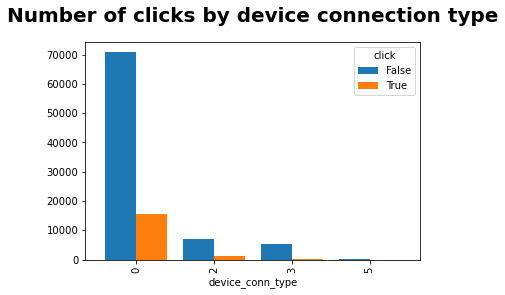

In [18]:
plt.figure(figsize=(12, 6))
CrosstabResult=pd.crosstab(index=ctr['device_conn_type'],columns=ctr['click'])
print(CrosstabResult)
 
# Grouped bar chart between "device connection type" and "click" columns
splot = CrosstabResult.plot.bar(width = 0.8)

plt.xticks(rotation = 90)
plt.title('Number of clicks by device connection type',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

From the graph we can say that most number of ads are on device connection type 0 and 2 positions and most number of clicks happen on these device connections only

click      False  True
dayofweek             
0           6560  1474
1          19562  3707
2          19264  3570
3          16384  3630
4           6806  1458
5           6775  1483
6           7668  1658


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tues'),
  Text(2, 0, 'Weds'),
  Text(3, 0, 'Thurs'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

<Figure size 864x432 with 0 Axes>

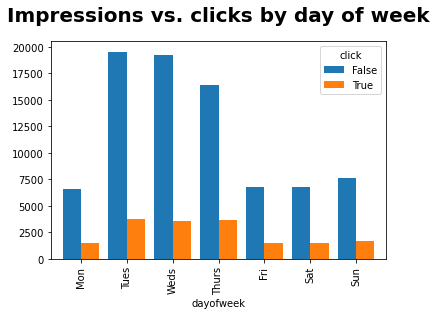

In [19]:
plt.figure(figsize=(12, 6))
CrosstabResult=pd.crosstab(index=ctr['dayofweek'],columns=ctr['click'])
print(CrosstabResult)
 
# Grouped bar chart between "Day part" and "Supply_Demand" columns
splot = CrosstabResult.plot.bar(width = 0.8)
ticks = list(range(0, 7, 1))
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('Impressions vs. clicks by day of week',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)
plt.xticks(rotation = 90)

From the graph we can say that most number of ads are posted on day Tuesday, Wednesday and Thursday and most muber of ctr happens on these days only

click  False  True
hour              
0       1676   329
1       1949   426
2       2448   502
3       2934   597
4       3921   743
5       4157   784
6       3613   752
7       3695   793
8       4355   896
9       4701   958
10      4464   881
11      4284   852
12      4679   959
13      4916   989
14      4438   955
15      4106   913
16      4158   919
17      4201   900
18      3642   747
19      2739   562
20      2283   419
21      2058   377
22      1920   364
23      1682   363


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

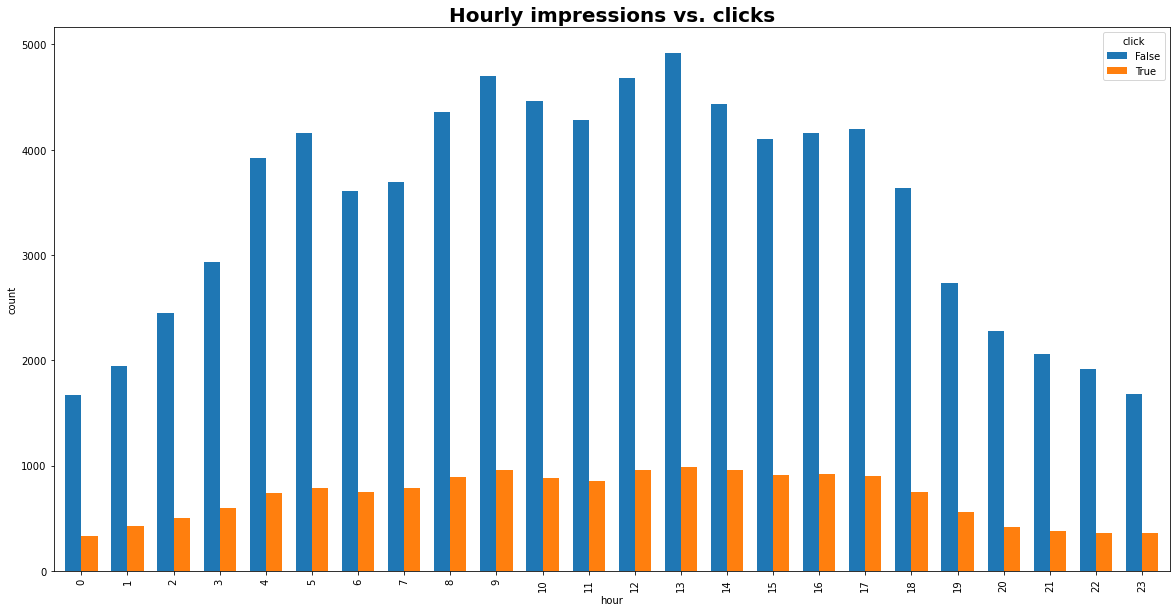

In [20]:
plt.rcParams["figure.figsize"] = (20,10)
CrosstabResult=pd.crosstab(index=ctr['hour'],columns=ctr['click'])
print(CrosstabResult)
 
# Grouped bar chart between "hour" and "Supply_Demand" columns
splot = CrosstabResult.plot.bar(width = 0.7)
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks',fontweight="bold",fontdict={'fontsize': 20})
plt.xticks(rotation = 90)

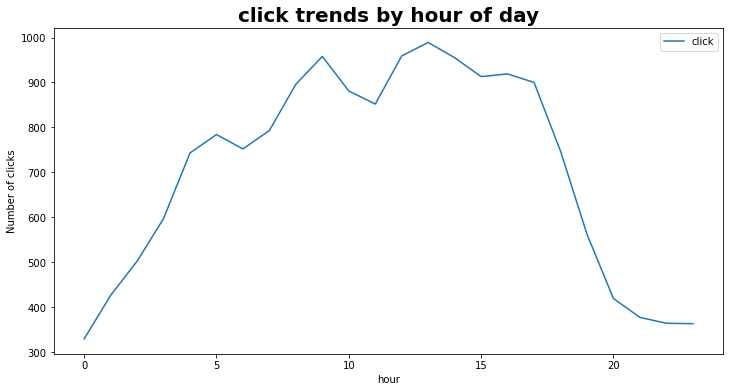

In [21]:
ctr.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day',fontweight="bold",fontdict={'fontsize': 20});

From the above two graphs we can conclude that most number of clicks happen around 9am to 4pm but most number of clicks happen at 1pm and 12pm

From the above cells we got to know "month" has only one value in the dataset which doesnt add value to our prediction. And with day column it has only "day" part of the date and that also doesnt add much value to our predictions. Same goes with "click"column has we have already "y" column which serves the same purpose.
So lets drop columns "month","day" and "click".

In [22]:
ctr1 = ctr.drop(["click","day","month"],axis=1)

# 2. Perform categorical variable treatment

## a. Identify the categorical columns 

In [23]:
categorical_cols = ctr.select_dtypes(
  include = ['object']).columns.tolist()
print("Categorical columns: ")
print(categorical_cols)


Categorical columns: 
['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']


Using label like encoding using pd.factorize for categorical variables which has values more than tens

In [24]:
ctr1['site_id']=pd.factorize(ctr1['site_id'])[0]
ctr1['site_category']  = pd.factorize(ctr1['site_category'])[0]
ctr1['site_domain']  = pd.factorize(ctr1['site_domain'])[0]
ctr1['app_id']  = pd.factorize(ctr1['app_id'])[0]
ctr1['app_domain']  = pd.factorize(ctr1['app_domain'])[0]
ctr1['app_category']  = pd.factorize(ctr1['app_category'])[0]
ctr1['device_id']  = pd.factorize(ctr1['device_id'])[0]
ctr1['device_ip']  = pd.factorize(ctr1['device_ip'])[0]
ctr1['device_model']  = pd.factorize(ctr1['device_model'])[0]

Using One-hot like encoding for categorical variables which are in numerical format and has unique values less than tens

In [25]:
ctr1 = pd.get_dummies(ctr1, columns = ["banner_pos","device_type","device_conn_type"])

In [26]:
ctr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   C1                  99999 non-null  int64
 1   site_id             99999 non-null  int64
 2   site_domain         99999 non-null  int64
 3   site_category       99999 non-null  int64
 4   app_id              99999 non-null  int64
 5   app_domain          99999 non-null  int64
 6   app_category        99999 non-null  int64
 7   device_id           99999 non-null  int64
 8   device_ip           99999 non-null  int64
 9   device_model        99999 non-null  int64
 10  C14                 99999 non-null  int64
 11  C15                 99999 non-null  int64
 12  C16                 99999 non-null  int64
 13  C17                 99999 non-null  int64
 14  C18                 99999 non-null  int64
 15  C19                 99999 non-null  int64
 16  C20                 99999 non-null  int6

As the data is not scaled and ML algorithm works better when features are relatively on a similar scale and close to Normal Distribution.


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(ctr1)
print(scaled.shape)

(99999, 36)


In [28]:
scaled_features_ctr = pd.DataFrame(scaled, index=ctr1.index, columns=ctr1.columns)

In [29]:
scaled_features_ctr.head()

,C1,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,...,banner_pos_5,banner_pos_7,device_type_0,device_type_1,device_type_4,device_type_5,device_conn_type_0,device_conn_type_2,device_conn_type_3,device_conn_type_5
0,0.029719,-0.377540,-0.341202,-1.080885,-0.275971,-0.45716,-0.497028,-0.384323,-1.396918,-0.642084,...,-0.009487,-0.032729,-0.241111,0.290050,-0.140323,-0.057977,0.396512,-0.295746,-0.239575,-0.033931
1,0.029719,-0.371433,-0.333510,-1.080885,-0.275971,-0.45716,-0.497028,-0.384323,-1.396876,-0.640092,...,-0.009487,-0.032729,-0.241111,0.290050,-0.140323,-0.057977,0.396512,-0.295746,-0.239575,-0.033931
2,0.029719,-0.365326,-0.325818,-0.280368,-0.275971,-0.45716,-0.497028,-0.384323,-1.396834,-0.638100,...,-0.009487,-0.032729,-0.241111,0.290050,-0.140323,-0.057977,0.396512,-0.295746,-0.239575,-0.033931
3,-2.717759,-0.359219,-0.318125,0.520149,-0.275971,-0.45716,-0.497028,-0.384055,-1.396792,-0.636108,...,-0.009487,-0.032729,4.147468,-3.447676,-0.140323,-0.057977,0.396512,-0.295746,-0.239575,-0.033931
4,0.029719,-0.353112,-0.310433,-0.280368,-0.275971,-0.45716,-0.497028,-0.384323,-1.396750,-0.634116,...,-0.009487,-0.032729,-0.241111,0.290050,-0.140323,-0.057977,0.396512,-0.295746,-0.239575,-0.033931


In [30]:
scaled_features_ctr.shape

(99999, 36)

In [31]:
scaled_features_ctr.columns

Index(['C1', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_ip', 'device_model', 'C14', 'C15',
       'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'dayofweek', 'hour', 'y',
       'banner_pos_0', 'banner_pos_1', 'banner_pos_2', 'banner_pos_3',
       'banner_pos_4', 'banner_pos_5', 'banner_pos_7', 'device_type_0',
       'device_type_1', 'device_type_4', 'device_type_5', 'device_conn_type_0',
       'device_conn_type_2', 'device_conn_type_3', 'device_conn_type_5'],
      dtype='object')

# 3. Perform a train-test split in the data set (the usual split followed in the industry is 70-30 or 80-20)

In [32]:
X = scaled_features_ctr.loc[:, ['C1', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_ip', 'device_model', 'C14', 'C15',
       'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'dayofweek', 'hour',
       'banner_pos_0', 'banner_pos_1', 'banner_pos_2', 'banner_pos_3',
       'banner_pos_4', 'banner_pos_5', 'banner_pos_7', 'device_type_0',
       'device_type_1', 'device_type_4', 'device_type_5', 'device_conn_type_0',
       'device_conn_type_2', 'device_conn_type_3', 'device_conn_type_5']] # independent variable
y =  ctr1.loc[:, ['y']] # dependent variable

In [33]:
from sklearn.model_selection import train_test_split
# Splitting the train and test data to 70 and 30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(69999, 35)
(69999, 1)
(30000, 35)
(30000, 1)


# 4. Identify the 3 classification methods you will use in the data set, and explain the reason you chose those 3 methods in the notebook file you will share in the submission process.

### Using Logistic Regression, Decision Tree and Random Forest for classification methods

### a. Logistic Regression

#### Reason for choosing Logistic Regression

##### Logistic Regression is used for prediction and classification problems as our problem statement states we have to predict ctr of ads.
a. Logistic regression is easier to implement and very efficient to train. It is very fast at classifying unknown records.
b. It can interpret model coefficients as indicators of feature importance.
c. Robust to noise


In [34]:
from sklearn.linear_model import LogisticRegression

# declare the logistic model
model = LogisticRegression()

# train the model on the data
model.fit(X_train, y_train)

C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

[[24952    46]
 [ 4992    10]]


C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


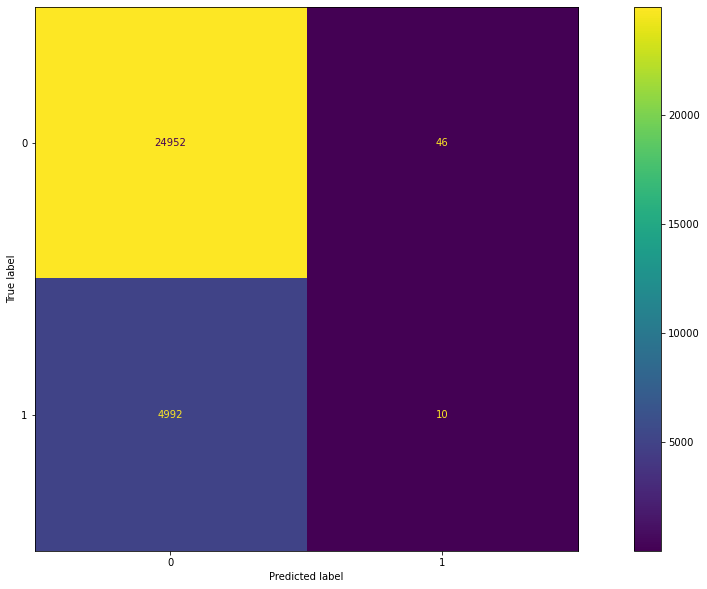

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     24998
           1       0.18      0.00      0.00      5002

    accuracy                           0.83     30000
   macro avg       0.51      0.50      0.46     30000
weighted avg       0.72      0.83      0.76     30000

Accuracy:  0.8320666666666666
Recall:  0.001999200319872051
Precision:  0.17857142857142858
f1 Score:  0.0039541320680110716


In [35]:
#predicting model
y_pred = model.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()
print(metrics.classification_report(y_test, y_pred))

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

print("Recall: ",metrics.recall_score(y_test, y_pred))

print("Precision: ",metrics.precision_score(y_test, y_pred))

print("f1 Score: ",metrics.f1_score(y_test, y_pred))

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.6389382602027595

As the data is highly imbalanced with more proportion of 0s. As we can see that our recall and precision are very low. So lets balance the dataset using class_weight parameter in Logistic Regression function.

### Logistic Regression using class_weight Parameter.

In [37]:
# Choosing dimensions for class_weight parameter
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y), y=y.values.reshape(-1))

In [38]:
class_weights

array([0.60226575, 2.94461131])

In [39]:
model_b = LogisticRegression(class_weight="balanced")

# train the model on the data
model_b.fit(X_train, y_train)

C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

[[14639 10359]
 [ 1967  3035]]


C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


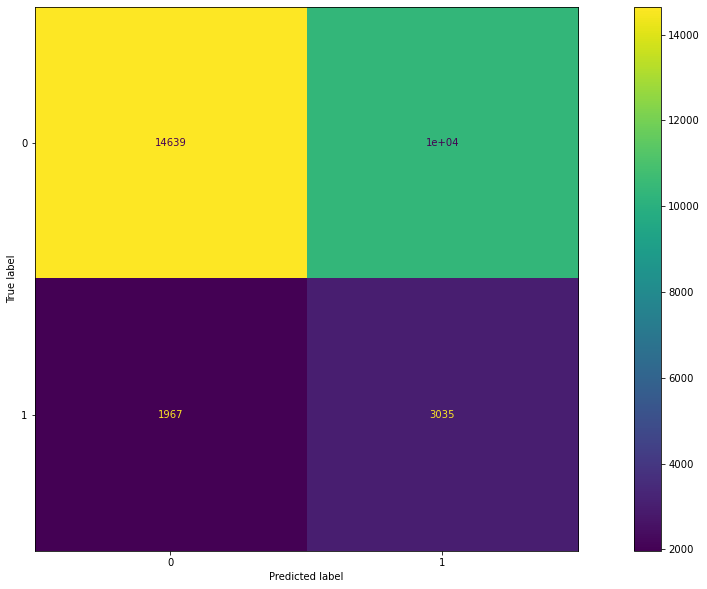

              precision    recall  f1-score   support

           0       0.88      0.59      0.70     24998
           1       0.23      0.61      0.33      5002

    accuracy                           0.59     30000
   macro avg       0.55      0.60      0.52     30000
weighted avg       0.77      0.59      0.64     30000

Accuracy:  0.5891333333333333
Recall:  0.6067572970811675
Precision:  0.22659399731222934
f1 Score:  0.32996303544248745


In [40]:
y_pred_b = model_b.predict(X_test)
# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_b)
print(cnf_matrix)
metrics.plot_confusion_matrix(model_b, X_test, y_test)
plt.show()
print(metrics.classification_report(y_test, y_pred_b))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_b))

print("Recall: ",metrics.recall_score(y_test, y_pred_b))

print("Precision: ",metrics.precision_score(y_test, y_pred_b))

print("f1 Score: ",metrics.f1_score(y_test, y_pred_b))

In [41]:
print("ROC AUC Score: ",roc_auc_score(y_test, model_b.predict_proba(X_test)[:, 1]))

ROC AUC Score:  0.6389826460007244


After balancing the dataset, precision, Recall and F1 score increased but Accuracy decreased.
Roc and Auc curve remain the same

#### Cross Validation for Logistic regression without balancing

In [42]:
from sklearn.model_selection import KFold,cross_val_score
from numpy import mean,std
k_fold = KFold(n_splits=4, random_state=1, shuffle=True)
lr = LogisticRegression()

y_pred_lr = lr.fit(X_train, y_train).predict(X_test) 
  
cv_recall = cross_val_score(lr, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
cv_precision = cross_val_score(lr, X_train, y_train, cv = k_fold, scoring = 'precision_weighted')
cv_f1 = cross_val_score(lr, X_train, y_train, cv = k_fold, scoring = 'f1_weighted')
cv_accuracy = cross_val_score(lr, X_train, y_train, cv = k_fold, scoring = 'accuracy')
print("Cross validation Recall: %s" %(cv_recall))
print("Cross validation Precision: %s" %(cv_precision))
print('Recall: %.3f (%.3f)' % (mean(cv_recall), std(cv_recall)))
print('Precision: %.3f (%.3f)' % (mean(cv_precision), std(cv_precision)))
print('f1: %.3f (%.3f)' % (mean(cv_f1), std(cv_f1)))
print('Accuracy: %.3f (%.3f)' % (mean(cv_accuracy), std(cv_accuracy)))

C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross validation Recall: [0.8292     0.82731429 0.82685714 0.82821876]
Cross validation Precision: [0.72743234 0.71990326 0.72346052 0.70746164]
Recall: 0.828 (0.001)
Precision: 0.720 (0.007)
f1: 0.751 (0.001)
Accuracy: 0.828 (0.001)


Performance metrics increased after cross validation

#### Cross Validation for Logistic regression with balancing

In [43]:
k_fold = KFold(n_splits=4, random_state=1, shuffle=True)
lrb = LogisticRegression(class_weight="balanced")

y_pred_lrb = lrb.fit(X_train, y_train).predict(X_test) 
  
cv_recall = cross_val_score(lrb, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
cv_precision = cross_val_score(lrb, X_train, y_train, cv = k_fold, scoring = 'precision_weighted')
cv_f1 = cross_val_score(lrb, X_train, y_train, cv = k_fold, scoring = 'f1_weighted')
cv_accuracy = cross_val_score(lrb, X_train, y_train, cv = k_fold, scoring = 'accuracy')
print("Cross validation Recall: %s" %(cv_recall))
print("Cross validation Precision: %s" %(cv_precision))
print('Recall: %.3f (%.3f)' % (mean(cv_recall), std(cv_recall)))
print('Precision: %.3f (%.3f)' % (mean(cv_precision), std(cv_precision)))
print('f1: %.3f (%.3f)' % (mean(cv_f1), std(cv_f1)))
print('Accuracy: %.3f (%.3f)' % (mean(cv_accuracy), std(cv_accuracy)))

C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross validation Recall: [0.59062857 0.59131429 0.58022857 0.58260472]
Cross validation Precision: [0.76319026 0.76615022 0.7661082  0.77226081]
Recall: 0.586 (0.005)
Precision: 0.767 (0.003)
f1: 0.637 (0.004)
Accuracy: 0.586 (0.005)


Precision increased after balancing the dataset using cross validation

### b. Decision Tree

##### Decision Tree is used for prediction and classification problems as our problem statement states we have to predict ctr of ads.

a. Decision Tree are easy to understand, interpret, visualize and much better to interpret than logistic regression.
b. The data type of decision tree can handle any type of data whether it is numerical or categorical, or boolean.
c. Normalization is not required in the Decision Tree.
d. The decision tree is one of the machine learning algorithms where we don’t worry about its feature scaling.
e. It gives us and a good idea about the relative importance of attributes.

In [44]:
from sklearn.tree import DecisionTreeClassifier
# looping through max_depth values
for max_depth_val in [2, 3, 5, 10, 15, 20]:
    clf = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evaluating tree with max_depth = %s" %(max_depth_val))
    y_pred_dt = clf.fit(X_train,y_train).predict(X_test) 
    print("Confusion matrix: ")
    print(metrics.confusion_matrix(y_test, y_pred_dt))
    prec = metrics.precision_score(y_test, y_pred_dt, average = 'weighted')
    recall = metrics.recall_score(y_test, y_pred_dt, average = 'weighted')
    
    print("Precision: %s, Recall: %s" %(prec, recall))
    print(metrics.classification_report(y_test, y_pred_dt))
    print("ROC AUC Score: ",roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

Evaluating tree with max_depth = 2
Confusion matrix: 
[[24998     0]
 [ 5002     0]]
Precision: 0.6943333377777778, Recall: 0.8332666666666667
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     24998
           1       0.00      0.00      0.00      5002

    accuracy                           0.83     30000
   macro avg       0.42      0.50      0.45     30000
weighted avg       0.69      0.83      0.76     30000

ROC AUC Score:  0.5965007308541501
Evaluating tree with max_depth = 3


C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classifi

Confusion matrix: 
[[24998     0]
 [ 5002     0]]
Precision: 0.6943333377777778, Recall: 0.8332666666666667
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     24998
           1       0.00      0.00      0.00      5002

    accuracy                           0.83     30000
   macro avg       0.42      0.50      0.45     30000
weighted avg       0.69      0.83      0.76     30000

ROC AUC Score:  0.6400587136934969
Evaluating tree with max_depth = 5


C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classifi

Confusion matrix: 
[[24662   336]
 [ 4678   324]]
Precision: 0.7822606750531903, Recall: 0.8328666666666666
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24998
           1       0.49      0.06      0.11      5002

    accuracy                           0.83     30000
   macro avg       0.67      0.53      0.51     30000
weighted avg       0.78      0.83      0.78     30000

ROC AUC Score:  0.6746367698220336
Evaluating tree with max_depth = 10
Confusion matrix: 
[[24490   508]
 [ 4577   425]]
Precision: 0.7780076781989174, Recall: 0.8305
              precision    recall  f1-score   support

           0       0.84      0.98      0.91     24998
           1       0.46      0.08      0.14      5002

    accuracy                           0.83     30000
   macro avg       0.65      0.53      0.52     30000
weighted avg       0.78      0.83      0.78     30000

ROC AUC Score:  0.6937725189946422
Evaluating tree with max_depth = 15


As we can see that for max_depth 10 we have precision of 0.77 and recall of 0.83 and f1 score of 0.78.
ROC AUC Score is 0.69 and it has comparitively high values compared to all other max_depth parameters used.


### Decision Tree using class_weight Parameter.

In [45]:
for max_depth_val in [2, 3, 5, 10, 15, 20]:
    clfb = DecisionTreeClassifier(max_depth = max_depth_val,class_weight="balanced")
    print("Evaluating tree with max_depth = %s" %(max_depth_val))
    y_pred_dtb = clfb.fit(X_train,y_train).predict(X_test) 
    print("Confusion matrix: ")
    print(metrics.confusion_matrix(y_test, y_pred_dtb))
    prec = metrics.precision_score(y_test, y_pred_dtb, average = 'weighted')
    recall = metrics.recall_score(y_test, y_pred_dtb, average = 'weighted')
    print("Precision: %s, Recall: %s" %(prec, recall))
    print(metrics.classification_report(y_test, y_pred_dtb))
    print("ROC AUC Score: ",roc_auc_score(y_test, clfb.predict_proba(X_test)[:, 1]))

Evaluating tree with max_depth = 2
Confusion matrix: 
[[17134  7864]
 [ 2564  2438]]
Precision: 0.7642620515542801, Recall: 0.6524
              precision    recall  f1-score   support

           0       0.87      0.69      0.77     24998
           1       0.24      0.49      0.32      5002

    accuracy                           0.65     30000
   macro avg       0.55      0.59      0.54     30000
weighted avg       0.76      0.65      0.69     30000

ROC AUC Score:  0.6254016274920546
Evaluating tree with max_depth = 3
Confusion matrix: 
[[11400 13598]
 [ 1241  3761]]
Precision: 0.7875871357069939, Recall: 0.5053666666666666
              precision    recall  f1-score   support

           0       0.90      0.46      0.61     24998
           1       0.22      0.75      0.34      5002

    accuracy                           0.51     30000
   macro avg       0.56      0.60      0.47     30000
weighted avg       0.79      0.51      0.56     30000

ROC AUC Score:  0.6430732331437374
Ev

Precision and ROC AUC Curve has increased while recall and accuracy has decreased for max_depth 10

So we can say that Decision tree gives good performance metrics for max_depth at 10 when it is balanced and imbalanced

[[14243 10755]
 [ 1379  3623]]


C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


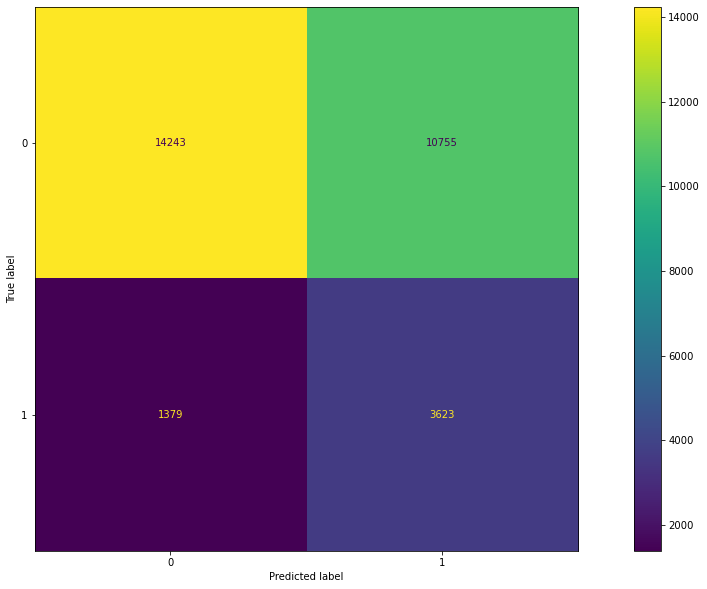

              precision    recall  f1-score   support

           0       0.91      0.57      0.70     24998
           1       0.25      0.72      0.37      5002

    accuracy                           0.60     30000
   macro avg       0.58      0.65      0.54     30000
weighted avg       0.80      0.60      0.65     30000

Accuracy:  0.5955333333333334
Precision: 0.801725592507845, Recall: 0.5955333333333334
f1 Score:  0.646693406807487
ROC AUC Score:  0.6963732988283206


In [46]:
# prdicting when max_depth is 10
clfb = DecisionTreeClassifier(max_depth = 10,class_weight={0: 0.6, 1: 2.9})
y_pred_dtb = clfb.fit(X_train,y_train).predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dtb)
print(cnf_matrix)
metrics.plot_confusion_matrix(clfb, X_test, y_test)
plt.show()
print(metrics.classification_report(y_test, y_pred_dtb))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_dtb))

prec = metrics.precision_score(y_test, y_pred_dtb, average = 'weighted')
recall = metrics.recall_score(y_test, y_pred_dtb, average = 'weighted')
print("Precision: %s, Recall: %s" %(prec, recall))
print("f1 Score: ",metrics.f1_score(y_test, y_pred_dtb,average = 'weighted'))
print("ROC AUC Score: ",roc_auc_score(y_test, clfb.predict_proba(X_test)[:, 1]))

#### Decision Tree Cross Validation

In [47]:
from sklearn.model_selection import KFold,cross_val_score
from numpy import mean
from numpy import std
for max_depth_val in [3, 5, 10,15,20]:
    k_fold = KFold(n_splits=4, random_state=1, shuffle=True)
    clf = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evaluating Decision Tree for max_depth = %s" %(max_depth_val))
    y_pred_dtk = clf.fit(X_train, y_train).predict(X_test) 
  
    cv_recall = cross_val_score(clf, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
    cv_precision = cross_val_score(clf, X_train, y_train, cv = k_fold, scoring = 'precision_weighted')
    cv_f1 = cross_val_score(clf, X_train, y_train, cv = k_fold, scoring = 'f1_weighted')
    cv_accuracy = cross_val_score(clf, X_train, y_train, cv = k_fold, scoring = 'accuracy')
    print("Cross validation Recall: %s" %(cv_recall))
    print("Cross validation Precision: %s" %(cv_precision))
    print('Recall: %.3f (%.3f)' % (mean(cv_recall), std(cv_recall)))
    print('Precision: %.3f (%.3f)' % (mean(cv_precision), std(cv_precision)))
    print('f1: %.3f (%.3f)' % (mean(cv_f1), std(cv_f1)))
    print('Accuracy: %.3f (%.3f)' % (mean(cv_accuracy), std(cv_accuracy)))

Evaluating Decision Tree for max_depth = 3


C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

Cross validation Recall: [0.82988571 0.82857143 0.82771429 0.82936168]
Cross validation Precision: [0.6887103  0.68653061 0.68511094 0.68784079]
Recall: 0.829 (0.001)
Precision: 0.687 (0.001)
f1: 0.751 (0.001)
Accuracy: 0.829 (0.001)
Evaluating Decision Tree for max_depth = 5
Cross validation Recall: [0.8296     0.82971429 0.82828571 0.8327333 ]
Cross validation Precision: [0.77869995 0.78118575 0.77949213 0.79348091]
Recall: 0.830 (0.002)
Precision: 0.783 (0.006)
f1: 0.770 (0.003)
Accuracy: 0.830 (0.002)
Evaluating Decision Tree for max_depth = 10
Cross validation Recall: [0.8252     0.82594286 0.82457143 0.82879022]
Cross validation Precision: [0.77043532 0.77412251 0.7677986  0.78107197]
Recall: 0.826 (0.002)
Precision: 0.773 (0.005)
f1: 0.773 (0.003)
Accuracy: 0.826 (0.002)
Evaluating Decision Tree for max_depth = 15
Cross validation Recall: [0.80542857 0.80942857 0.80634286 0.80953197]
Cross validation Precision: [0.74961994 0.75341531 0.75081372 0.75652237]
Recall: 0.808 (0.002)


As we can see that using cross validation for decision tree we can say that at max_depth 5 we have high precision, recall and f1

#### Decision Tree Cross Validation with balancing

In [48]:
for max_depth_val in [3, 5, 10,15,20]:
    k_fold = KFold(n_splits=4, random_state=1, shuffle=True)
    clf = DecisionTreeClassifier(max_depth = max_depth_val,class_weight="balanced")
    print("Evaluating Decision Tree for max_depth = %s" %(max_depth_val))
    y_pred_dtk = clf.fit(X_train, y_train).predict(X_test) 
  
    cv_recall = cross_val_score(clf, X_train, y_train, cv = k_fold, scoring = 'recall_weighted')
    cv_precision = cross_val_score(clf, X_train, y_train, cv = k_fold, scoring = 'precision_weighted')
    cv_f1 = cross_val_score(clf, X_train, y_train, cv = k_fold, scoring = 'f1_weighted')
    cv_accuracy = cross_val_score(clf, X_train, y_train, cv = k_fold, scoring = 'accuracy')
    print("Cross validation Recall: %s" %(cv_recall))
    print("Cross validation Precision: %s" %(cv_precision))
    print('Recall: %.3f (%.3f)' % (mean(cv_recall), std(cv_recall)))
    print('Precision: %.3f (%.3f)' % (mean(cv_precision), std(cv_precision)))
    print('f1: %.3f (%.3f)' % (mean(cv_f1), std(cv_f1)))
    print('Accuracy: %.3f (%.3f)' % (mean(cv_accuracy), std(cv_accuracy)))

Evaluating Decision Tree for max_depth = 3
Cross validation Recall: [0.49845714 0.50811429 0.50177143 0.50271444]
Cross validation Precision: [0.78043365 0.7807947  0.7781248  0.78423559]
Recall: 0.503 (0.003)
Precision: 0.781 (0.002)
f1: 0.556 (0.003)
Accuracy: 0.503 (0.003)
Evaluating Decision Tree for max_depth = 5
Cross validation Recall: [0.55108571 0.58377143 0.57685714 0.56231785]
Cross validation Precision: [0.78824114 0.78537955 0.78182382 0.78629786]
Recall: 0.569 (0.013)
Precision: 0.785 (0.002)
f1: 0.621 (0.012)
Accuracy: 0.569 (0.013)
Evaluating Decision Tree for max_depth = 10
Cross validation Recall: [0.6144     0.6156     0.6456     0.57797588]
Cross validation Precision: [0.78927118 0.79208155 0.78814336 0.79277749]
Recall: 0.613 (0.024)
Precision: 0.791 (0.002)
f1: 0.661 (0.021)
Accuracy: 0.613 (0.024)
Evaluating Decision Tree for max_depth = 15
Cross validation Recall: [0.61274286 0.61714286 0.61662857 0.62575004]
Cross validation Precision: [0.77948296 0.78111048 0.

We have high precision at max_depth 10, high recall at max_depth 20 and high f1 at max_depth 20

### c. Random Forest

#### Reason for choosing Logistic Regression

##### Random Forest is used for prediction and classification problems as our problem statement states we have to predict ctr of ads.

a. A classification algorithm consisting of many decision trees combined to get a more accurate result as compared to a single tree.
b. Random forest algorithm avoids and prevents overfitting by using multiple trees.
c. This gives accurate and precise results.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# deciding best parameters for random forest using randomized search cv
param_grid = {
    'bootstrap': [True],
    'max_depth': [10], 
    'n_estimators':[2,5,10,20,50],
    'min_samples_split': [2, 3, 4],
    'max_features' : ['log2']
}

rf = RandomForestClassifier(random_state=42)

rf_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, n_iter = 10)

model_search = rf_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\srina\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [50]:
rf_search.best_params_

{'n_estimators': 50,
 'min_samples_split': 3,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

Above are best parameters for Random forest 

In [51]:
clf_rf = RandomForestClassifier(n_estimators= 50,
min_samples_split= 3,
max_features= 'log2',
max_depth= 10,
bootstrap= True,
random_state=42)
clf_rf.fit(X_train,y_train)

C:\Users\srina\AppData\Local\Temp\ipykernel_2640\2076870096.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=3,
                       n_estimators=50, random_state=42)

[[24799   199]
 [ 4750   252]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24998
           1       0.56      0.05      0.09      5002

    accuracy                           0.84     30000
   macro avg       0.70      0.52      0.50     30000
weighted avg       0.79      0.84      0.77     30000



C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


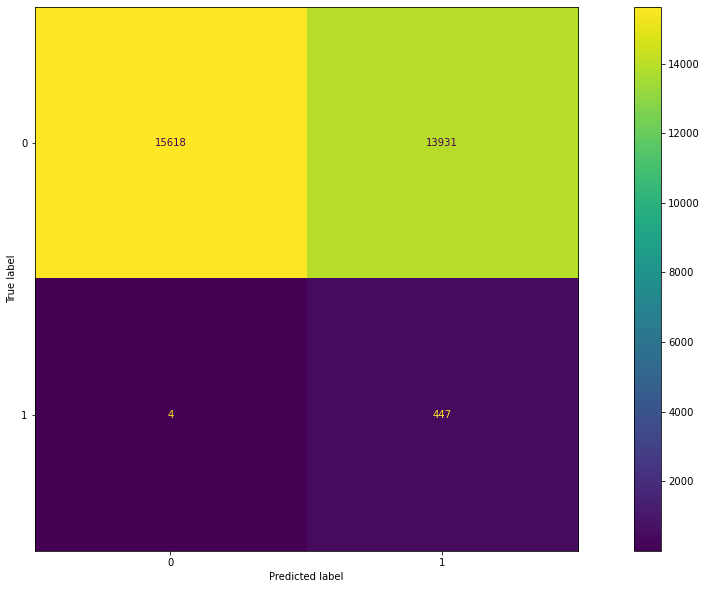

Accuracy:  0.8350333333333333
Precision: 0.7924827357127402, Recall: 0.8350333333333333
f1 Score:  0.7730756615814013
ROC AUC Score:  0.7185575805680608


In [52]:
y_test_pred_rf = clf_rf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_test_pred_rf))
print(metrics.classification_report(y_test, y_test_pred_rf))
metrics.plot_confusion_matrix(clfb, X_test, y_test_pred_rf)
plt.show()
print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred_rf))

prec = metrics.precision_score(y_test, y_test_pred_rf, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred_rf, average = 'weighted')
print("Precision: %s, Recall: %s" %(prec, recall))
print("f1 Score: ",metrics.f1_score(y_test, y_test_pred_rf,average = 'weighted'))
print("ROC AUC Score: ",roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:, 1]))

#### Random Forest Classifier using class_weight parameter

In [53]:
clf_rfb = RandomForestClassifier(n_estimators= 50,
min_samples_split= 3,
max_features= 'log2',
max_depth= 10,
bootstrap= True,
random_state=42,class_weight="balanced")
clf_rfb.fit(X_train,y_train)

C:\Users\srina\AppData\Local\Temp\ipykernel_2640\2109324472.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rfb.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=3,
                       n_estimators=50, random_state=42)

[[16945  8053]
 [ 1779  3223]]
              precision    recall  f1-score   support

           0       0.90      0.68      0.78     24998
           1       0.29      0.64      0.40      5002

    accuracy                           0.67     30000
   macro avg       0.60      0.66      0.59     30000
weighted avg       0.80      0.67      0.71     30000



C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


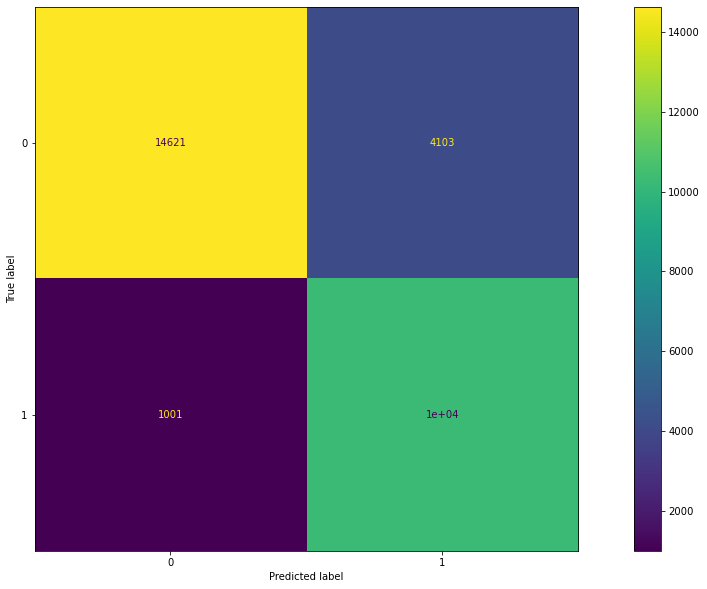

Accuracy:  0.6722666666666667
Precision: 0.8017536493004801, Recall: 0.6722666666666667
f1 Score:  0.7119110329890438
ROC AUC Score:  0.7183852397116199


In [54]:
y_test_pred_rfb = clf_rfb.predict(X_test)

print(metrics.confusion_matrix(y_test, y_test_pred_rfb))
print(metrics.classification_report(y_test, y_test_pred_rfb))
metrics.plot_confusion_matrix(clfb, X_test, y_test_pred_rfb)
plt.show()
print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred_rfb))

prec = metrics.precision_score(y_test, y_test_pred_rfb, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred_rfb, average = 'weighted')
print("Precision: %s, Recall: %s" %(prec, recall))
print("f1 Score: ",metrics.f1_score(y_test, y_test_pred_rfb,average = 'weighted'))
print("ROC AUC Score: ",roc_auc_score(y_test, clf_rfb.predict_proba(X_test)[:, 1]))

Precision slightly improved when we balanced the data using class_weight parameter but recall and f1 score decreased.

#### Cross Validation for Random forest

In [55]:
from sklearn.model_selection import cross_validate



SRF = RandomForestClassifier(n_estimators= 50,
min_samples_split= 3,
max_features= 'log2',
max_depth= 10,
bootstrap= True)
#Create K-fold cross validation
cv =KFold(n_splits=4, random_state=1, shuffle=True)
y_pred_srf = SRF.fit(X_train, y_train).predict(X_test)
scoring = ('f1', 'recall', 'precision')
#Evaluate SRF model
scores = cross_validate(SRF, X_train, y_train, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

C:\Users\srina\AppData\Local\Temp\ipykernel_2640\2363095614.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred_srf = SRF.fit(X_train, y_train).predict(X_test)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed wh

Mean f1: 0.096
Mean recall: 0.052
Mean precision: 0.591


#### Random forest cross validation with balancing

In [56]:

SRFB = RandomForestClassifier(n_estimators= 50,
min_samples_split= 3,
max_features= 'log2',
max_depth= 10,
bootstrap= True,class_weight="balanced")
#Create Stratified K-fold cross validation
cv =KFold(n_splits=4, random_state=1, shuffle=True)
scoring = ('f1', 'recall', 'precision')
#Evaluate SRF model
scores = cross_validate(SRFB, X_train, y_train, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

C:\Users\srina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Mean f1: 0.386
Mean recall: 0.622
Mean precision: 0.280


# 6. Compare which methods work best based on the evaluation metrics mentioned in the previous point.

As our dataset is highly imbalanced and have very large negative samples so its best to use precision.
Precision is not affected by a large number of negative samples, that’s because it measures the number of true positives out of the samples predicted as positives (True Positives+False Positives).

Precision is more focused in the positive class than in the negative class, it actually measures the probability of correct detection of positive values, while False Positive Rate and True Positive Rate (ROC metrics) measure the ability to distinguish between the classes.
Using Precision, Recall & F1-score, when negative class is the majority and your focus class is positive.

Out of the three models, Random forest and Decision tree both have good metrics without cross validation compared to Logistic Regression. But Random forest is more stable than Decision Tree and it is a good classifier compared to logistic regression.
Therefore, standard classification algorithms like logistic regression do not work as they try to minimize the error rate rather than focus on the minority class, giving bias classification. Random forest is an ideal algorithm to deal with the extreme imbalance owing to two main reasons. Firstly, the ability to incorporate class weights into the random forest classifier makes it cost-sensitive; hence it penalizes misclassifying the minority class. Secondly, it combines the sampling technique and ensemble learning, therefore, downsampling the majority class and growing trees on a more balanced dataset.

# 7. Use model simplification techniques like feature creation and selection, to improve model predictability. 

### Feature Engineering using SelectKBest Feature

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
test = SelectKBest(score_func=f_classif, k=15)
fit = test.fit(X, y)
# summarize scores

print(fit.scores_)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns, df_scores], axis=1)
features = fit.transform(X)
# summarize selected features
feature_scores.columns = ["Feature Name","Score"]
x = (feature_scores.nlargest(40,"Score"))

[1.42776086e+02 5.89733413e+00 5.94332317e+00 3.59366757e+01
 1.13304522e+02 4.59836595e+02 2.16414768e+02 1.89993604e+01
 7.28636252e+00 5.39429629e-01 3.66750347e+02 1.00656647e+02
 1.75513309e+03 3.28232422e+02 5.97574879e+01 5.16236901e-04
 3.25140049e+02 4.94110010e+02 1.96022627e+01 4.52998281e-01
 3.65539059e+01 3.39453378e+01 2.09219805e-03 1.82505496e-01
 1.85073974e+00 1.84094619e+00 1.66360239e+01 1.02008412e+02
 1.22866478e+01 7.76129246e+01 6.79544457e+00 5.59876973e+02
 8.68064814e+01 5.75842808e+02 1.48908686e+01]


C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
x

,Feature Name,Score
12,C16,1755.133090
33,device_conn_type_3,575.842808
31,device_conn_type_0,559.876973
17,C21,494.110010
5,app_domain,459.836595
10,C14,366.750347
13,C17,328.232422
16,C20,325.140049
6,app_category,216.414768
0,C1,142.776086


#### Selecting features which are above 50 

In [59]:
x["Feature Name"][:16]

12                   C16
33    device_conn_type_3
31    device_conn_type_0
17                   C21
5             app_domain
10                   C14
13                   C17
16                   C20
6           app_category
0                     C1
4                 app_id
27         device_type_0
11                   C15
32    device_conn_type_2
29         device_type_4
14                   C18
Name: Feature Name, dtype: object

In [60]:
X1 = scaled_features_ctr.loc[:,['C16','device_conn_type_3','device_conn_type_0','C21','app_domain','C14','C17','C20','app_category','C1','app_id','device_type_0','C15','device_conn_type_2','device_type_4','C18']]

y1 =  ctr1.loc[:, ['y']]

In [61]:
# splitting train and test data by 70 and 30 ratio
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(69999, 16)
(69999, 1)
(30000, 16)
(30000, 1)


### a. Logistic Regression

In [62]:

# diclare the logistic model
model1 = LogisticRegression()

# train the model on the data
model1.fit(X1_train, y1_train)

C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

[[24836    44]
 [ 5108    12]]


C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


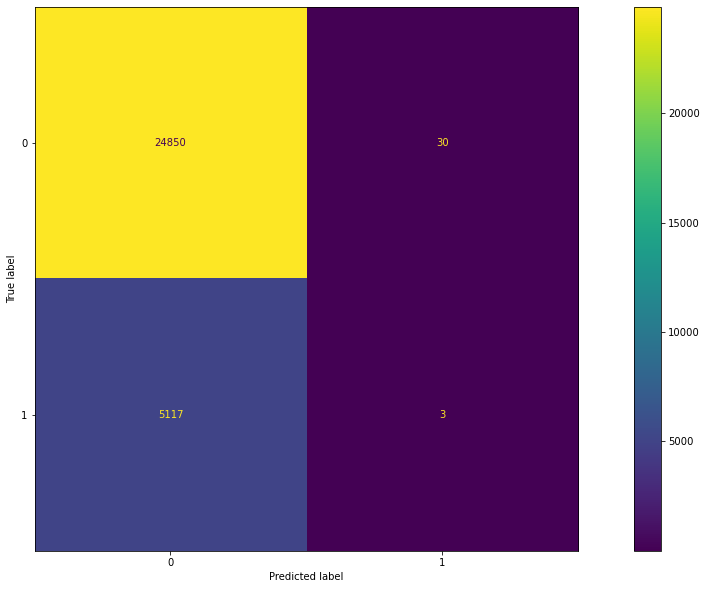

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     24880
           1       0.21      0.00      0.00      5120

    accuracy                           0.83     30000
   macro avg       0.52      0.50      0.46     30000
weighted avg       0.72      0.83      0.75     30000

Accuracy:  0.8282666666666667
Recall:  0.00234375
Precision:  0.21428571428571427
f1 Score:  0.00463678516228748


In [63]:
# predict the model
y1_pred = model1.predict(X1_test)


cnf_matrix = metrics.confusion_matrix(y1_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(model1, X1_test, y1_test)
plt.show()
print(metrics.classification_report(y1_test, y_pred))
print("Accuracy: ", metrics.accuracy_score(y1_test, y_pred))

print("Recall: ",metrics.recall_score(y1_test, y_pred))

print("Precision: ",metrics.precision_score(y1_test, y_pred))

print("f1 Score: ",metrics.f1_score(y1_test, y_pred))

#### Cross Validation with class_weight parameter

In [64]:
model_b1 = LogisticRegression(class_weight={0:0.6,1:2.9})

# train the model on the data
model_b1.fit(X1_train, y1_train)

C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight={0: 0.6, 1: 2.9})

[[15030  9850]
 [ 2078  3042]]


C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


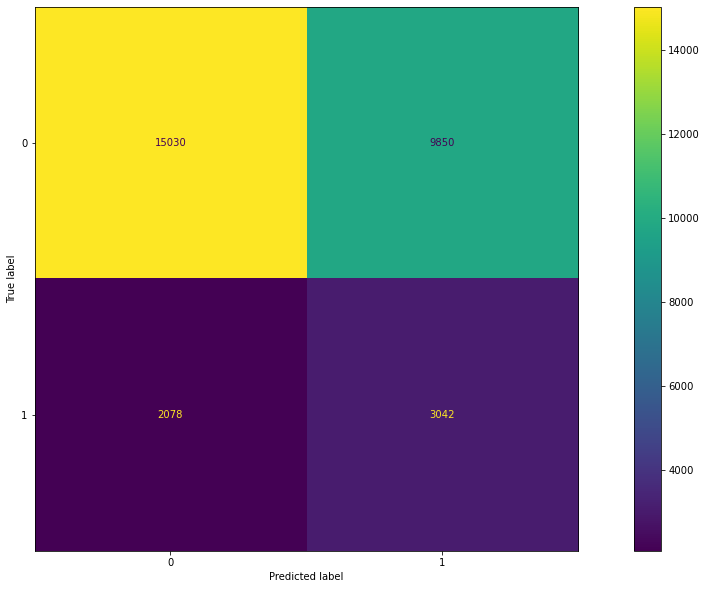

              precision    recall  f1-score   support

           0       0.88      0.60      0.72     24880
           1       0.24      0.59      0.34      5120

    accuracy                           0.60     30000
   macro avg       0.56      0.60      0.53     30000
weighted avg       0.77      0.60      0.65     30000

Accuracy:  0.6024
Recall:  0.594140625
Precision:  0.23596028544834005
f1 Score:  0.33777481678880744


In [65]:
#predict the model
y_pred_b1 = model_b1.predict(X1_test)

cnf_matrix = metrics.confusion_matrix(y1_test, y_pred_b1)
print(cnf_matrix)
metrics.plot_confusion_matrix(model_b1, X1_test, y1_test)
plt.show()
print(metrics.classification_report(y1_test, y_pred_b1))
print("Accuracy: ", metrics.accuracy_score(y1_test, y_pred_b1))

print("Recall: ",metrics.recall_score(y1_test, y_pred_b1))

print("Precision: ",metrics.precision_score(y1_test, y_pred_b1))

print("f1 Score: ",metrics.f1_score(y1_test, y_pred_b1))

#### Cross validation Logistic Regression

In [66]:
k_fold = KFold(n_splits=4, random_state=1, shuffle=True)
lr1 = LogisticRegression()

y_pred_lr1 = lr1.fit(X1_train, y1_train).predict(X1_test) 
  
cv_recall = cross_val_score(lr1, X1_train, y1_train, cv = k_fold, scoring = 'recall_weighted')
cv_precision = cross_val_score(lr1, X1_train, y1_train, cv = k_fold, scoring = 'precision_weighted')
cv_f1 = cross_val_score(lr1, X1_train, y1_train, cv = k_fold, scoring = 'f1_weighted')
cv_accuracy = cross_val_score(lr1, X1_train, y1_train, cv = k_fold, scoring = 'accuracy')
print("Cross validation Recall: %s" %(cv_recall))
print("Cross validation Precision: %s" %(cv_precision))
print('Recall: %.3f (%.3f)' % (mean(cv_recall), std(cv_recall)))
print('Precision: %.3f (%.3f)' % (mean(cv_precision), std(cv_precision)))
print('f1: %.3f (%.3f)' % (mean(cv_f1), std(cv_f1)))
print('Accuracy: %.3f (%.3f)' % (mean(cv_accuracy), std(cv_accuracy)))

C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross validation Recall: [0.83028571 0.83251429 0.82828571 0.82776159]
Cross validation Precision: [0.72460691 0.71480163 0.73004068 0.71769582]
Recall: 0.830 (0.002)
Precision: 0.722 (0.006)
f1: 0.754 (0.003)
Accuracy: 0.830 (0.002)


#### Logistic regression cross validation with class_weight parameter

In [67]:
k_fold = KFold(n_splits=4, random_state=1, shuffle=True)
lrb1 = LogisticRegression(class_weight="balanced")

y_pred_lrb1 = lrb1.fit(X1_train, y1_train).predict(X1_test) 
  
cv_recall = cross_val_score(lrb1, X1_train, y1_train, cv = k_fold, scoring = 'recall_weighted')
cv_precision = cross_val_score(lrb1, X1_train, y1_train, cv = k_fold, scoring = 'precision_weighted')
cv_f1 = cross_val_score(lrb1, X1_train, y1_train, cv = k_fold, scoring = 'f1_weighted')
cv_accuracy = cross_val_score(lrb1, X1_train, y1_train, cv = k_fold, scoring = 'accuracy')
print("Cross validation Recall: %s" %(cv_recall))
print("Cross validation Precision: %s" %(cv_precision))
print('Recall: %.3f (%.3f)' % (mean(cv_recall), std(cv_recall)))
print('Precision: %.3f (%.3f)' % (mean(cv_precision), std(cv_precision)))
print('f1: %.3f (%.3f)' % (mean(cv_f1), std(cv_f1)))
print('Accuracy: %.3f (%.3f)' % (mean(cv_accuracy), std(cv_accuracy)))

C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross validation Recall: [0.60108571 0.5756     0.56508571 0.57311846]
Cross validation Precision: [0.76714893 0.76632926 0.76278933 0.76555756]
Recall: 0.579 (0.013)
Precision: 0.765 (0.002)
f1: 0.631 (0.012)
Accuracy: 0.579 (0.013)


#### a. Decision Tree Without balancing

In [68]:
for max_depth_val in [2, 3, 5, 10, 15, 20]:
    clf1 = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evaluating tree with max_depth = %s" %(max_depth_val))
    y_pred_dt1 = clf1.fit(X1_train,y1_train).predict(X1_test) 
    print("Confusion matrix: ")
    print(metrics.confusion_matrix(y1_test, y_pred_dt1))
    prec = metrics.precision_score(y1_test, y_pred_dt1, average = 'weighted')
    recall = metrics.recall_score(y1_test, y_pred_dt1, average = 'weighted')
    
    print("Precision: %s, Recall: %s" %(prec, recall))
    print(metrics.classification_report(y1_test, y_pred_dt1))
    print("ROC AUC Score: ",roc_auc_score(y1_test, clf1.predict_proba(X1_test)[:, 1]))

Evaluating tree with max_depth = 2
Confusion matrix: 
[[24880     0]
 [ 5120     0]]
Precision: 0.6877937777777778, Recall: 0.8293333333333334
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     24880
           1       0.00      0.00      0.00      5120

    accuracy                           0.83     30000
   macro avg       0.41      0.50      0.45     30000
weighted avg       0.69      0.83      0.75     30000

ROC AUC Score:  

C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classifi

0.592621944709606
Evaluating tree with max_depth = 3
Confusion matrix: 
[[24880     0]
 [ 5120     0]]
Precision: 0.6877937777777778, Recall: 0.8293333333333334


C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classifi

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     24880
           1       0.00      0.00      0.00      5120

    accuracy                           0.83     30000
   macro avg       0.41      0.50      0.45     30000
weighted avg       0.69      0.83      0.75     30000

ROC AUC Score:  0.6271028122487942
Evaluating tree with max_depth = 5
Confusion matrix: 
[[24592   288]
 [ 4766   354]]
Precision: 0.788804649616009, Recall: 0.8315333333333333
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24880
           1       0.55      0.07      0.12      5120

    accuracy                           0.83     30000
   macro avg       0.69      0.53      0.51     30000
weighted avg       0.79      0.83      0.77     30000

ROC AUC Score:  0.6548702757611536
Evaluating tree with max_depth = 10
Confusion matrix: 
[[24554   326]
 [ 4737   383]]
Precision: 0.7874055626214118, Recall: 0.8312333

#### Decision Tree with class_weight parameter

In [69]:
for max_depth_val in [2, 3, 5, 10, 15, 20]:
    clfb1 = DecisionTreeClassifier(max_depth = max_depth_val,class_weight="balanced")
    print("Evaluating tree with max_depth = %s" %(max_depth_val))
    y_pred_dtb1 = clfb1.fit(X1_train,y1_train).predict(X1_test) 
    print("Confusion matrix: ")
    print(metrics.confusion_matrix(y1_test, y_pred_dtb1))
    prec = metrics.precision_score(y1_test, y_pred_dtb1, average = 'weighted')
    recall = metrics.recall_score(y1_test, y_pred_dtb1, average = 'weighted')
    print("Precision: %s, Recall: %s" %(prec, recall))
    print(metrics.classification_report(y1_test, y_pred_dtb1))
    print("ROC AUC Score: ",roc_auc_score(y1_test, clfb1.predict_proba(X1_test)[:, 1]))

Evaluating tree with max_depth = 2
Confusion matrix: 
[[16997  7883]
 [ 2698  2422]]
Precision: 0.7558357692313852, Recall: 0.6473
              precision    recall  f1-score   support

           0       0.86      0.68      0.76     24880
           1       0.24      0.47      0.31      5120

    accuracy                           0.65     30000
   macro avg       0.55      0.58      0.54     30000
weighted avg       0.76      0.65      0.69     30000

ROC AUC Score:  0.6185222701781048
Evaluating tree with max_depth = 3
Confusion matrix: 
[[ 8230 16650]
 [  816  4304]]
Precision: 0.7895781368877018, Recall: 0.4178
              precision    recall  f1-score   support

           0       0.91      0.33      0.49     24880
           1       0.21      0.84      0.33      5120

    accuracy                           0.42     30000
   macro avg       0.56      0.59      0.41     30000
weighted avg       0.79      0.42      0.46     30000

ROC AUC Score:  0.6311252959518188
Evaluating tre

#### Decision Tree with Cross validation

In [70]:

for max_depth_val in [3, 5, 10,15,20]:
    k_fold = KFold(n_splits=4, random_state=1, shuffle=True)
    clf1 = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evaluating Decision Tree for max_depth = %s" %(max_depth_val))
    y_pred_dtk1 = clf1.fit(X1_train, y1_train).predict(X1_test) 
  
    cv_recall = cross_val_score(clf1, X1_train, y1_train, cv = k_fold, scoring = 'recall_weighted')
    cv_precision = cross_val_score(clf1, X1_train, y1_train, cv = k_fold, scoring = 'precision_weighted')
    cv_f1 = cross_val_score(clf1, X1_train, y1_train, cv = k_fold, scoring = 'f1_weighted')
    cv_accuracy = cross_val_score(clf1, X1_train, y1_train, cv = k_fold, scoring = 'accuracy')
    print("Cross validation Recall: %s" %(cv_recall))
    print("Cross validation Precision: %s" %(cv_precision))
    print('Recall: %.3f (%.3f)' % (mean(cv_recall), std(cv_recall)))
    print('Precision: %.3f (%.3f)' % (mean(cv_precision), std(cv_precision)))
    print('f1: %.3f (%.3f)' % (mean(cv_f1), std(cv_f1)))
    print('Accuracy: %.3f (%.3f)' % (mean(cv_accuracy), std(cv_accuracy)))

Evaluating Decision Tree for max_depth = 3


C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross validation Recall: [0.83102857 0.8336     0.82897143 0.82856163]
Cross validation Precision: [0.69078241 0.69488896 0.68719363 0.68651438]
Recall: 0.831 (0.002)
Precision: 0.690 (0.003)
f1: 0.754 (0.003)
Accuracy: 0.831 (0.002)
Evaluating Decision Tree for max_depth = 5
Cross validation Recall: [0.83028571 0.83365714 0.83108571 0.82941882]
Cross validation Precision: [0.77656486 0.78512119 0.78838117 0.78237274]
Recall: 0.831 (0.002)
Precision: 0.783 (0.004)
f1: 0.773 (0.003)
Accuracy: 0.831 (0.002)
Evaluating Decision Tree for max_depth = 10
Cross validation Recall: [0.82845714 0.83268571 0.82942857 0.82759015]
Cross validation Precision: [0.76814354 0.78251005 0.78192557 0.7767095 ]
Recall: 0.830 (0.002)
Precision: 0.777 (0.006)
f1: 0.772 (0.004)
Accuracy: 0.830 (0.002)
Evaluating Decision Tree for max_depth = 15
Cross validation Recall: [0.82371429 0.82851429 0.8264     0.82416138]
Cross validation Precision: [0.76188402 0.77443627 0.77212574 0.7661477 ]
Recall: 0.826 (0.002)


#### Decision Tree  cross validation with class_weight parameter

In [71]:
for max_depth_val in [3, 5, 10,15,20]:
    k_fold = KFold(n_splits=4, random_state=1, shuffle=True)
    clfb1 = DecisionTreeClassifier(max_depth = max_depth_val,class_weight="balanced")
    print("Evaluating Decision Tree for max_depth = %s" %(max_depth_val))
    y_pred_dtkb1 = clfb1.fit(X1_train, y1_train).predict(X1_test) 
  
    cv_recall = cross_val_score(clfb1, X1_train, y1_train, cv = k_fold, scoring = 'recall_weighted')
    cv_precision = cross_val_score(clfb1, X1_train, y1_train, cv = k_fold, scoring = 'precision_weighted')
    cv_f1 = cross_val_score(clfb1, X1_train, y1_train, cv = k_fold, scoring = 'f1_weighted')
    cv_accuracy = cross_val_score(clfb1, X1_train, y1_train, cv = k_fold, scoring = 'accuracy')
    print("Cross validation Recall: %s" %(cv_recall))
    print("Cross validation Precision: %s" %(cv_precision))
    print('Recall: %.3f (%.3f)' % (mean(cv_recall), std(cv_recall)))
    print('Precision: %.3f (%.3f)' % (mean(cv_precision), std(cv_precision)))
    print('f1: %.3f (%.3f)' % (mean(cv_f1), std(cv_f1)))
    print('Accuracy: %.3f (%.3f)' % (mean(cv_accuracy), std(cv_accuracy)))

Evaluating Decision Tree for max_depth = 3
Cross validation Recall: [0.42662857 0.41914286 0.41868571 0.42082405]
Cross validation Precision: [0.79216555 0.79498251 0.78483668 0.79332325]
Recall: 0.421 (0.003)
Precision: 0.791 (0.004)
f1: 0.464 (0.004)
Accuracy: 0.421 (0.003)
Evaluating Decision Tree for max_depth = 5
Cross validation Recall: [0.46977143 0.44914286 0.45114286 0.44768272]
Cross validation Precision: [0.78994452 0.80205311 0.78839382 0.79657428]
Recall: 0.454 (0.009)
Precision: 0.794 (0.005)
f1: 0.502 (0.011)
Accuracy: 0.454 (0.009)
Evaluating Decision Tree for max_depth = 10
Cross validation Recall: [0.58817143 0.58622857 0.57822857 0.59974856]
Cross validation Precision: [0.79594123 0.79146614 0.78750289 0.79246501]
Recall: 0.588 (0.008)
Precision: 0.792 (0.003)
f1: 0.639 (0.007)
Accuracy: 0.588 (0.008)
Evaluating Decision Tree for max_depth = 15
Cross validation Recall: [0.61422857 0.6116     0.5964     0.59740557]
Cross validation Precision: [0.79193934 0.79092727 0.

### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [10], 
    'n_estimators':[2,5,10,20,50],
    'min_samples_split': [2, 3, 4],
    'max_features' : ['log2']
}

rf = RandomForestClassifier(random_state=42)

rf_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2, n_iter = 10)

model_search = rf_search.fit(X1_train,y1_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\srina\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [73]:
rf_search.best_params_

{'n_estimators': 50,
 'min_samples_split': 3,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

In [74]:
clf_rf1 = RandomForestClassifier(n_estimators= 50,
min_samples_split= 3,
max_features= 'log2',
max_depth= 10,
bootstrap= True,
random_state=42)
clf_rf1.fit(X1_train,y1_train)

C:\Users\srina\AppData\Local\Temp\ipykernel_2640\651838126.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf1.fit(X1_train,y1_train)


RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=3,
                       n_estimators=50, random_state=42)

[[24693   187]
 [ 4863   257]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     24880
           1       0.58      0.05      0.09      5120

    accuracy                           0.83     30000
   macro avg       0.71      0.52      0.50     30000
weighted avg       0.79      0.83      0.77     30000



C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


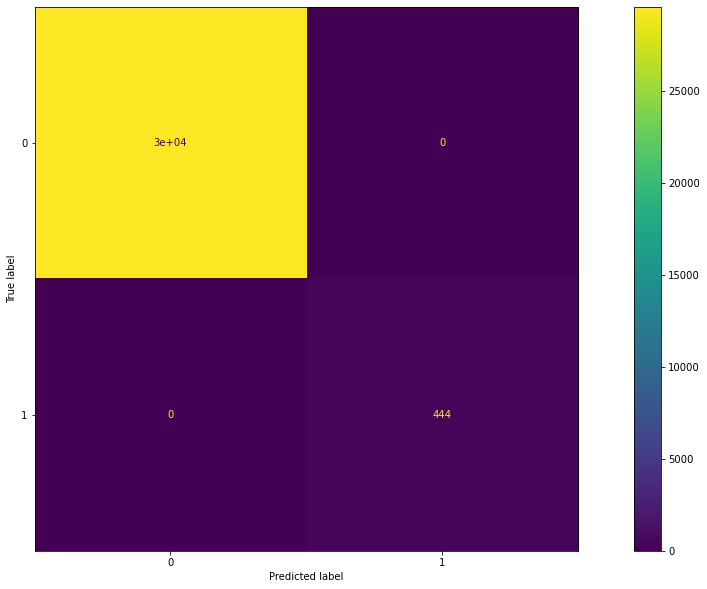

Accuracy:  0.8316666666666667
Precision: 0.7916656607886814, Recall: 0.8316666666666667
f1 Score:  0.768162617819078
ROC AUC Score:  0.7027114838725884


In [75]:
y_test_pred_rf1 = clf_rf1.predict(X1_test)

print(metrics.confusion_matrix(y1_test, y_test_pred_rf1))
print(metrics.classification_report(y1_test, y_test_pred_rf1))
metrics.plot_confusion_matrix(clf_rf1, X1_test, y_test_pred_rf1)
plt.show()
print("Accuracy: ", metrics.accuracy_score(y1_test, y_test_pred_rf1))

prec = metrics.precision_score(y1_test, y_test_pred_rf1, average = 'weighted')
recall = metrics.recall_score(y1_test, y_test_pred_rf1, average = 'weighted')
print("Precision: %s, Recall: %s" %(prec, recall))
print("f1 Score: ",metrics.f1_score(y1_test, y_test_pred_rf1,average = 'weighted'))
print("ROC AUC Score: ",roc_auc_score(y1_test, clf_rf1.predict_proba(X1_test)[:, 1]))

#### Random Forest with class_weight parameter

In [76]:
clf_rfb1 = RandomForestClassifier(n_estimators= 50,
min_samples_split= 3,
max_features= 'log2',
max_depth= 10,
bootstrap= True,
random_state=42,class_weight="balanced")
clf_rfb1.fit(X1_train,y1_train)

C:\Users\srina\AppData\Local\Temp\ipykernel_2640\3175308855.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rfb1.fit(X1_train,y1_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=3,
                       n_estimators=50, random_state=42)

[[15401  9479]
 [ 1695  3425]]
              precision    recall  f1-score   support

           0       0.90      0.62      0.73     24880
           1       0.27      0.67      0.38      5120

    accuracy                           0.63     30000
   macro avg       0.58      0.64      0.56     30000
weighted avg       0.79      0.63      0.67     30000



C:\Users\srina\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


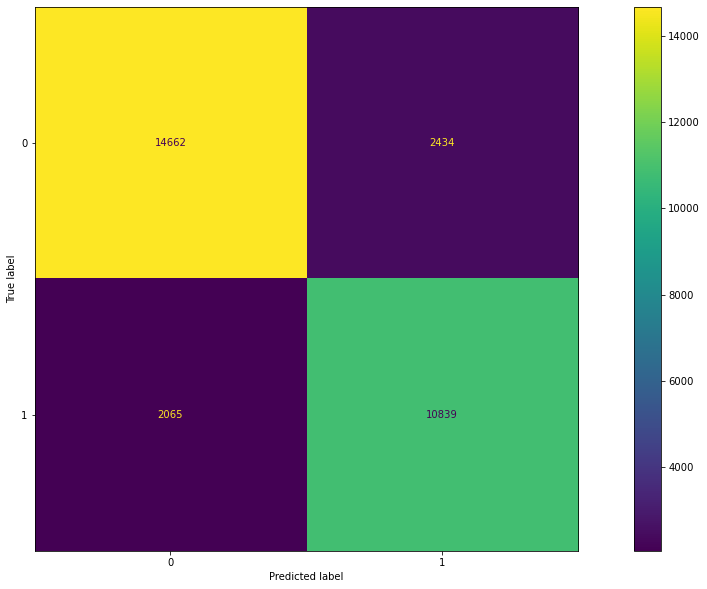

Accuracy:  0.6275333333333334
Precision: 0.792406866859241, Recall: 0.6275333333333334
f1 Score:  0.6734266872089147
ROC AUC Score:  0.7021307314170518


In [77]:
y_test_pred_rfb1 = clf_rfb1.predict(X1_test)

print(metrics.confusion_matrix(y1_test, y_test_pred_rfb1))
print(metrics.classification_report(y1_test, y_test_pred_rfb1))
metrics.plot_confusion_matrix(clfb1, X1_test, y_test_pred_rfb1)
plt.show()
print("Accuracy: ", metrics.accuracy_score(y1_test, y_test_pred_rfb1))

prec = metrics.precision_score(y1_test, y_test_pred_rfb1, average = 'weighted')
recall = metrics.recall_score(y1_test, y_test_pred_rfb1, average = 'weighted')
print("Precision: %s, Recall: %s" %(prec, recall))
print("f1 Score: ",metrics.f1_score(y1_test, y_test_pred_rfb1,average = 'weighted'))
print("ROC AUC Score: ",roc_auc_score(y1_test, clf_rfb1.predict_proba(X1_test)[:, 1]))

#### Random Forest Cross validation

In [78]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold


SRF1 = RandomForestClassifier(n_estimators= 50,
min_samples_split= 3,
max_features= 'log2',
max_depth= 10,
bootstrap= True)
#Create K-fold cross validation
cv =KFold(n_splits=4, random_state=1, shuffle=True)
y_pred_srf1 = SRF1.fit(X1_train, y1_train).predict(X1_test)
scoring = ('f1', 'recall', 'precision')
#Evaluate SRF model
scores = cross_validate(SRF1, X1_train, y1_train, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

C:\Users\srina\AppData\Local\Temp\ipykernel_2640\1147786680.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred_srf1 = SRF1.fit(X1_train, y1_train).predict(X1_test)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was pass

Mean f1: 0.090
Mean recall: 0.049
Mean precision: 0.549


Random Forest Cross validation with balancing

In [79]:
SRFB1 = RandomForestClassifier(n_estimators= 50,
min_samples_split= 3,
max_features= 'log2',
max_depth= 10,
bootstrap= True,class_weight="balanced")
#Create K-fold cross validation
cv =KFold(n_splits=4, random_state=1, shuffle=True)
scoring = ('f1', 'recall', 'precision')
#Evaluate SRF model
scores = cross_validate(SRFB1, X1_train, y1_train, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

C:\Users\srina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\srina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Mean f1: 0.377
Mean recall: 0.657
Mean precision: 0.264


The performance metrics for all the 3 models with and without feature engineering varies very slightly and it didn't improve much as before and after feature engineering.